# Sharpe Ratio
- Represents both the risk and return
- Developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk.

### Formula

$SR = \frac{R_p - R_f}{\sigma_p}$
- $SR$: Sharpe ratio
- $R_p$: return of portfolio
- $R_f$: risk free return
- $\sigma_p$: standard deviation of portfolio

Goal is to get high $SR$. 

### Need to understand
- Portfolio return (done in part 1)
- Risk free return
- Standard deviation of portfolio (or the risk)

### Resources
- **Risk free return** 10 Year Treasury Note https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/textview.aspx?data=yield
- Sharpe Ratio https://www.investopedia.com/terms/s/sharperatio.asp
- Standard deviation https://www.investopedia.com/terms/s/standarddeviation.asp

In [1]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [5]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2021,12,12)

data = pdr.get_data_yahoo(tickers, start,end)

In [6]:
data.head()

Attributes   Adj Close                                          Close  \
Symbols           AAPL        MSFT       TWTR         IBM        AAPL   
Date                                                                    
2021-01-04  128.453430  215.434982  54.529999  111.285995  129.410004   
2021-01-05  130.041611  215.642776  53.880001  113.261383  131.009995   
2021-01-06  125.664207  210.051300  53.259998  116.089775  126.599998   
2021-01-07  129.952271  216.028763  52.330002  115.820396  130.919998   
2021-01-08  131.073929  217.344971  51.480000  115.407364  132.050003   

Attributes                                           High              ...  \
Symbols           MSFT       TWTR         IBM        AAPL        MSFT  ...   
Date                                                                   ...   
2021-01-04  217.690002  54.529999  118.489487  133.610001  223.000000  ...   
2021-01-05  217.899994  53.880001  120.592735  131.740005  218.520004  ...   
2021-01-06  212.250000  53.259998  123.604210  131.050003  216.490005  ...   
2021-01-07  218.289993  52.330002  123.317398  131.630005  219.339996  ...   
2021-01-08  219.619995  51.480000  122.877632  132.630005  220.580002  ...   

Attributes        Low                    Open                         \
Symbols          TWTR         IBM        AAPL        MSFT       TWTR   
Date                                                                   
2021-01-04  53.580002  117.629066  133.520004  222.529999  54.490002   
2021-01-05  53.150002  119.130020  128.889999  217.259995  53.410000   
2021-01-06  52.570000  121.147224  127.720001  212.169998  53.270000   
2021-01-07  51.459999  122.619499  128.360001  214.039993  52.220001   
2021-01-08  50.189999  121.395790  132.429993  218.679993  52.500000   

Attributes                   Volume                                     
Symbols            IBM         AAPL        MSFT        TWTR        IBM  
Date                                                                    
2021-01-04  120.315491  143301900.0  37130100.0  12231600.0  5417443.0  
2021-01-05  119.512428   97664900.0  23823000.0   8317200.0  6395872.0  
2021-01-06  121.319313  155088000.0  35930700.0   9260000.0  8322708.0  
2021-01-07  124.321220  109578200.0  27694500.0  18967600.0  4714740.0  
2021-01-08  122.915871  105158200.0  22956200.0  16955400.0  4891305.0  

[5 rows x 24 columns]

In [7]:
data = data['Adj Close']

In [8]:
data

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2021-01-04,128.453430,215.434982,54.529999,111.285995
2021-01-05,130.041611,215.642776,53.880001,113.261383
2021-01-06,125.664207,210.051300,53.259998,116.089775
2021-01-07,129.952271,216.028763,52.330002,115.820396
2021-01-08,131.073929,217.344971,51.480000,115.407364
...,...,...,...,...
2021-12-06,165.109650,325.516937,44.470001,118.482819
2021-12-07,170.962173,334.228912,44.459999,120.132935
2021-12-08,174.857224,334.278809,45.720001,121.555794


In [9]:
portfolio = [.25, .15, .40, .20]

In [10]:
np.sum(portfolio)

1.0

In [11]:
np.sum(np.log(data/data.shift())*portfolio, axis=1)

Date
2021-01-04    0.000000
2021-01-05    0.001939
2021-01-06   -0.012197
2021-01-07    0.005087
2021-01-08   -0.004205
                ...   
2021-12-06    0.030773
2021-12-07    0.015346
2021-12-08    0.019188
2021-12-09    0.005731
2021-12-10    0.004114
Length: 238, dtype: float64

In [13]:
log_return = np.sum(np.log(data/data.shift())*portfolio, axis=1)

In [14]:
log_return

Date
2021-01-04    0.000000
2021-01-05    0.001939
2021-01-06   -0.012197
2021-01-07    0.005087
2021-01-08   -0.004205
                ...   
2021-12-06    0.030773
2021-12-07    0.015346
2021-12-08    0.019188
2021-12-09    0.005731
2021-12-10    0.004114
Length: 238, dtype: float64

In [15]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


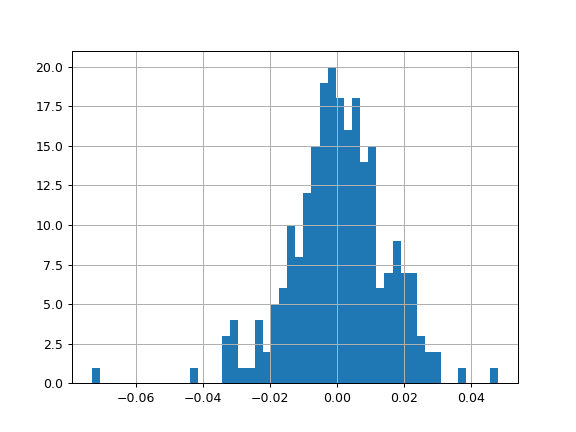

<AxesSubplot:>

In [16]:
fig, ax = plt.subplots()
log_return.hist(bins=50, ax=ax)   

In [17]:
log_return.std()

0.014670290152820403

In [18]:
log_return.mean()

0.00042021636202471506

In [21]:
sharpe_ratio = log_return.mean()/log_return.std()

In [22]:
sharpe_ratio

0.0286440389145219

In [23]:
asr = sharpe_ratio*252**.5

In [24]:
asr

0.45471002107368885

In [25]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.20656888, 0.32470434, 0.44035915, 0.02836764])

In [26]:
log_return2 = np.sum(np.log(data/data.shift())*weight, axis=1)

In [27]:
sharpe_ratio2 = log_return2.mean()/log_return2.std()

In [28]:
asr2 = sharpe_ratio2*252**.5

In [29]:
asr2

0.5804624310232332

Usually, any Sharpe ratio greater than 1.0 is considered acceptable to good by investors. A ratio higher than 2.0 is rated as very good. A ratio of 3.0 or higher is considered excellent. A ratio under 1.0 is considered sub-optimal. 
 In this case our sharpe ratio (asr2) is not optimal
  